In [1]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter 
import numpy as np 
from random import random, seed
import functions as fx
import sklearn.model_selection as sklm

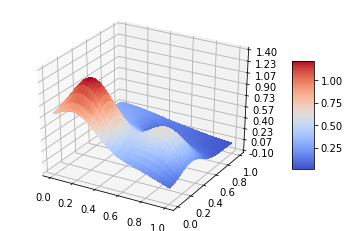

In [2]:
fig         = plt.figure() 
ax          = fig.gca(projection='3d')
n_x         = 200

# Make data. 
x           = np.sort(np.random.uniform(0, 1, n_x))
y           = np.sort(np.random.uniform(0, 1, n_x))
design      = fx.DesignDesign(x,y,5)

x, y        = np.meshgrid(x,y)
noise_level = 0.0


frank       = fx.FrankeFunction(x, y, noise_level)


# Plot the surface. 
surf        = ax.plot_surface(x, y, frank, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis. 
ax.set_zlim(-0.10, 1.40) 
ax.zaxis.set_major_locator(LinearLocator(10)) 
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors. 
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


This is not a nice way of plotting the data, do you know any better display methods? Preferably less grainy.

# OLS

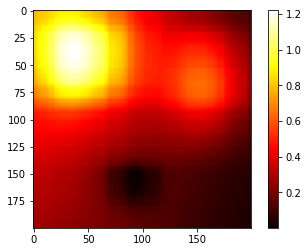

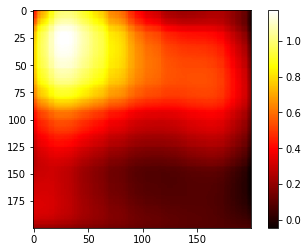

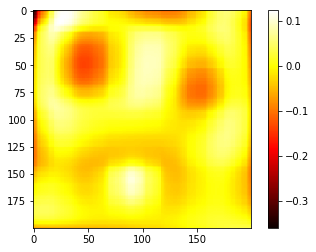

MSE OLS 0.002105253869384223
r2 OLS 0.9751765349931596


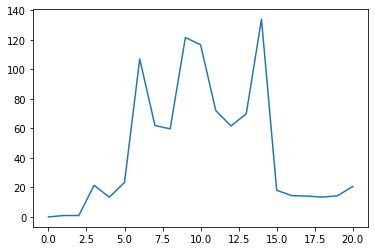

In [8]:

beta_ols       = fx.OridinaryLeastSquares(design,np.ravel(frank))
frank_pred_ols = design @ beta_ols

pred_ols       = frank_pred.reshape((int(len(frank_pred)/n_x),n_x))

plt.imshow(frank, label='test',cmap='hot')
plt.colorbar()
plt.show()

plt.imshow(pred_ols, label='pred',cmap='hot')
plt.colorbar()
plt.show()

plt.imshow(pred_ols-frank, label='differance',cmap='hot')
plt.colorbar()
plt.show()

# mean squared error 
mse_ols   = fx.MSE(frank,pred_ols)
print('MSE OLS', mse_ols)

# R2 score 
r2_ols    = fx.R2Score(frank,pred_ols)
print('r2 OLS', r2_ols)

# variance beta
var_ols   = fx.VarianceBeta(design)
plt.plot(var_ols)
plt.show()


# Ridge

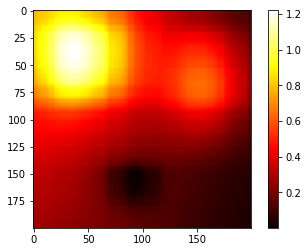

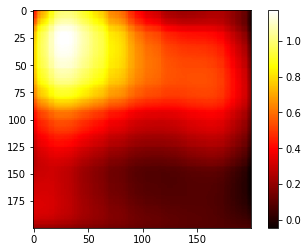

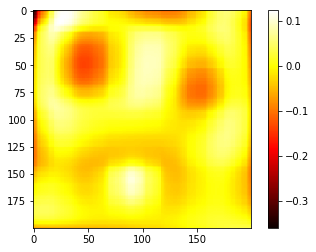

MSE Ridge 0.002105253869384223
r2 Ridge 0.9751765349931596


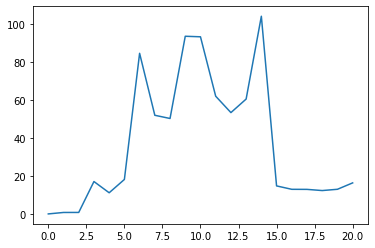

In [9]:
_lambda            = 10e-04
beta_ridge         = fx.RidgeRegression(design,np.ravel(frank),_lambda)
frank_pred_ridge   = design @ beta_ols

pred_ridge         = frank_pred.reshape((int(len(frank_pred)/n_x),n_x))


plt.imshow(frank, label='test',cmap='hot')
plt.colorbar()
plt.show()


plt.imshow(pred_ridge, label='pred',cmap='hot')
plt.colorbar()
plt.show()

plt.imshow(pred_ridge-frank, label='differance',cmap='hot')
plt.colorbar()
plt.show()

# mean squared error 
mse_ridge   = fx.MSE(frank,pred_ridge)
print('MSE Ridge', mse_ridge)

# R2 score 
r2_ridge    = fx.R2Score(frank,pred_ridge)
print('r2 Ridge', r2_ridge)

# variance beta
var_ridge   = fx.VarianceBeta(design,_lambda)
plt.plot(var_ridge)
plt.show()




In [ ]:
x_train, x_test, frank_train, frank_test = sklm.train_test_split(design,np.ravel(frank))


beta_ols   = fx.OridinaryLeastSquares(x_train,frank_train)
frank_pred = x_test @ beta_ols

pred = frank_pred.reshape((int(len(frank_pred)/n_x),n_x))

plt.plot(np.sort(frank_test), label='test')
plt.plot(np.sort(frank_pred), label='pred')
plt.legend()
plt.show()

